In [9]:
!export AUTOGRAPH_VERBOSITY=0
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import tensorflow as tf 
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
# tf.compat.v1.logging.set_verbosity(100)

In [10]:
%load_ext autoreload
%autoreload 2
import cantera as ct
import os
import gym 
import numpy as np 
import pandas as pd
from stable_baselines.common.policies import MlpPolicy, CnnLstmPolicy,MlpLstmPolicy
from stable_baselines.common.vec_env import SubprocVecEnv
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines.common import set_global_seeds
from stable_baselines import ACKTR, PPO2
from envs.sim_env import SimEnv, NO_idx, CO_idx, O2_idx, H2O_idx
from envs.SimUtils import solvePhi_airSplit, equil, runMainBurner, correctNOx
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
model = PPO2.load('Trained Models/PPO2_MlpPolicy_11172019_1000000.zip')

In [25]:
from stable_baselines.common.vec_env import DummyVecEnv
sim_env = SimEnv()
env = DummyVecEnv([lambda: sim_env])
# env = SimEnv()
obs = env.reset()
env.action_space.high

array([1., 1., 1.])

In [29]:
import pdb 
game_over = False
results_list = []
while not game_over: 
#     action, _states = model.predict(obs)
    action = env.action_space.high[np.newaxis,:]
#     action = env.action_space.high[np.newaxis,:]
    obs, rewards, game_over, info = env.step(action)
    env.render(mode='human')
    g = env.envs[0].sec_stage_gas
    results_list.append([
        env.envs[0].age/1e-3, 
        g.T, 
        correctNOx(g.X[NO_idx], g.X[H2O_idx], g.X[O2_idx]),
        correctNOx(g.X[CO_idx], g.X[H2O_idx], g.X[O2_idx]),
        env.envs[0].mfc_main.mdot(0),
        env.envs[0].mfc_fuel_sec.mdot(0),
        env.envs[0].mfc_air_sec.mdot(0), 
        env.envs[0].remaining_main_burner_mass,
        env.envs[0].sec_fuel_remaining,
        env.envs[0].sec_air_remaining,
        rewards, ])

step|age_(ms)|T|phi_norm|NO|CO|Rem_Main|Rem_SecFuel|Rem_SecAir|Mdot_Main|Mdot_SecFuel|Mdot_SecAir|Max_Main|Max_SecFuel|Max_SecAir|Reward|Reward_Reactants|Reward_T|Reward_NO|Reward_CO
1| 0.00| 1081.86| 0.58| 0.05| 0.89| 88.65| 1.69| 9.63| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 299.55|0.06| 0.00|199.50|100.00
2| 0.00| 1081.86| 0.58| 0.05| 0.89| 88.63| 1.69| 9.62| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 299.61|0.12| 0.00|199.50|100.00
3| 0.00| 1081.87| 0.58| 0.05| 0.89| 88.61| 1.69| 9.61| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 299.67|0.17| 0.00|199.50|100.00
4| 0.00| 1081.87| 0.58| 0.05| 0.89| 88.60| 1.68| 9.60| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 299.73|0.23| 0.00|199.50|100.00
5| 0.00| 1081.88| 0.58| 0.05| 0.89| 88.58| 1.68| 9.59| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 299.79|0.29| 0.00|199.50|100.00
6| 0.01| 1081.88| 0.58| 0.05| 0.89| 88.56| 1.68| 9.58| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 299.84|0.35| 0.00|199.50|100.00
7| 0.01| 1081.88| 0

90| 0.09| 1081.94| 0.58| 0.05| 0.84| 87.07| 1.54| 8.77| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 304.73|5.23| 0.00|199.50|100.00
91| 0.09| 1081.94| 0.58| 0.05| 0.84| 87.05| 1.54| 8.77| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 304.79|5.29| 0.00|199.50|100.00
92| 0.09| 1081.94| 0.58| 0.05| 0.84| 87.04| 1.54| 8.76| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 304.84|5.35| 0.00|199.50|100.00
93| 0.09| 1081.94| 0.58| 0.05| 0.84| 87.02| 1.53| 8.75| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 304.90|5.41| 0.00|199.50|100.00
94| 0.09| 1081.94| 0.58| 0.05| 0.84| 87.00| 1.53| 8.74| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 304.96|5.46| 0.00|199.50|100.00
95| 0.09| 1081.94| 0.58| 0.05| 0.84| 86.98| 1.53| 8.73| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 305.02|5.52| 0.00|199.50|100.00
96| 0.10| 1081.94| 0.58| 0.05| 0.84| 86.96| 1.53| 8.72| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 305.08|5.58| 0.00|199.50|100.00
97| 0.10| 1081.94| 0.58| 0.05| 0.84| 86.95| 1.53| 8.71| 17733.

155| 0.15| 1081.95| 0.58| 0.05| 0.82| 85.92| 1.43| 8.15| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 308.50|9.01| 0.00|199.50|100.00
156| 0.16| 1081.95| 0.58| 0.05| 0.82| 85.90| 1.43| 8.14| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 308.56|9.07| 0.00|199.50|100.00
157| 0.16| 1081.95| 0.58| 0.05| 0.82| 85.88| 1.43| 8.13| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 308.62|9.13| 0.00|199.50|100.00
158| 0.16| 1081.95| 0.58| 0.05| 0.82| 85.87| 1.42| 8.12| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 308.68|9.19| 0.00|199.50|100.00
159| 0.16| 1081.95| 0.58| 0.05| 0.82| 85.85| 1.42| 8.11| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 308.74|9.24| 0.00|199.50|100.00
160| 0.16| 1081.95| 0.58| 0.05| 0.82| 85.83| 1.42| 8.10| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 308.79|9.30| 0.00|199.50|100.00
161| 0.16| 1081.95| 0.58| 0.05| 0.82| 85.81| 1.42| 8.09| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 308.85|9.36| 0.00|199.50|100.00
162| 0.16| 1081.95| 0.58| 0.05| 0.81| 85.79| 1.42| 8.08

218| 0.22| 1081.96| 0.58| 0.05| 0.80| 84.80| 1.32| 7.54| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 312.16|12.67| 0.00|199.50|100.00
219| 0.22| 1081.96| 0.58| 0.05| 0.80| 84.78| 1.32| 7.53| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 312.22|12.73| 0.00|199.50|100.00
220| 0.22| 1081.96| 0.58| 0.05| 0.80| 84.77| 1.32| 7.52| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 312.28|12.79| 0.00|199.50|100.00
221| 0.22| 1081.96| 0.58| 0.05| 0.80| 84.75| 1.32| 7.51| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 312.33|12.85| 0.00|199.50|100.00
222| 0.22| 1081.96| 0.58| 0.05| 0.80| 84.73| 1.32| 7.50| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 312.39|12.91| 0.00|199.50|100.00
223| 0.22| 1081.96| 0.58| 0.05| 0.80| 84.71| 1.31| 7.49| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 312.45|12.96| 0.00|199.50|100.00
224| 0.22| 1081.96| 0.58| 0.05| 0.80| 84.69| 1.31| 7.48| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 312.51|13.02| 0.00|199.50|100.00
225| 0.22| 1081.96| 0.58| 0.05| 0.80| 84.68| 1.3

281| 0.28| 1081.97| 0.58| 0.05| 0.79| 83.68| 1.22| 6.93| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 315.81|16.34| 0.00|199.50|100.00
282| 0.28| 1081.97| 0.58| 0.05| 0.79| 83.67| 1.21| 6.92| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 315.87|16.39| 0.00|199.50|100.00
283| 0.28| 1081.97| 0.58| 0.05| 0.79| 83.65| 1.21| 6.91| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 315.93|16.45| 0.00|199.50|100.00
284| 0.28| 1081.97| 0.58| 0.05| 0.79| 83.63| 1.21| 6.90| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 315.98|16.51| 0.00|199.50|100.00
285| 0.29| 1081.97| 0.58| 0.05| 0.79| 83.61| 1.21| 6.89| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 316.04|16.57| 0.00|199.50|100.00
286| 0.29| 1081.97| 0.58| 0.05| 0.79| 83.60| 1.21| 6.88| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 316.10|16.63| 0.00|199.50|100.00
287| 0.29| 1081.97| 0.58| 0.05| 0.79| 83.58| 1.21| 6.88| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 316.16|16.68| 0.00|199.50|100.00
288| 0.29| 1081.97| 0.58| 0.05| 0.79| 83.56| 1.2

349| 0.35| 1081.98| 0.58| 0.04| 0.78| 82.48| 1.10| 6.28| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 319.74|20.29| 0.00|199.50|100.00
350| 0.35| 1081.98| 0.58| 0.04| 0.78| 82.46| 1.10| 6.27| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 319.80|20.35| 0.00|199.50|100.00
351| 0.35| 1081.98| 0.58| 0.04| 0.78| 82.44| 1.10| 6.26| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 319.86|20.40| 0.00|199.50|100.00
352| 0.35| 1081.98| 0.58| 0.04| 0.78| 82.42| 1.10| 6.25| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 319.92|20.46| 0.00|199.50|100.00
353| 0.35| 1081.98| 0.58| 0.04| 0.78| 82.41| 1.09| 6.24| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 319.97|20.52| 0.00|199.50|100.00
354| 0.35| 1081.98| 0.58| 0.04| 0.78| 82.39| 1.09| 6.23| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 320.03|20.58| 0.00|199.50|100.00
355| 0.36| 1081.98| 0.58| 0.04| 0.78| 82.37| 1.09| 6.22| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 320.09|20.64| 0.00|199.50|100.00
356| 0.36| 1081.98| 0.58| 0.04| 0.78| 82.35| 1.0

422| 0.42| 1081.99| 0.58| 0.04| 0.78| 81.18| 0.98| 5.57| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 323.95|24.53| 0.00|199.50|100.00
423| 0.42| 1081.99| 0.58| 0.04| 0.78| 81.17| 0.98| 5.56| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 324.01|24.59| 0.00|199.50|100.00
424| 0.42| 1081.99| 0.58| 0.04| 0.78| 81.15| 0.97| 5.55| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 324.07|24.65| 0.00|199.50|100.00
425| 0.43| 1081.99| 0.58| 0.04| 0.78| 81.13| 0.97| 5.54| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 324.13|24.71| 0.00|199.50|100.00
426| 0.43| 1081.99| 0.58| 0.04| 0.78| 81.11| 0.97| 5.53| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 324.18|24.76| 0.00|199.50|100.00
427| 0.43| 1081.99| 0.58| 0.04| 0.78| 81.09| 0.97| 5.53| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 324.24|24.82| 0.00|199.50|100.00
428| 0.43| 1081.99| 0.58| 0.04| 0.78| 81.08| 0.97| 5.52| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 324.30|24.88| 0.00|199.50|100.00
429| 0.43| 1081.99| 0.58| 0.04| 0.78| 81.06| 0.9

499| 0.50| 1082.00| 0.58| 0.04| 0.78| 79.82| 0.85| 4.83| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 328.38|29.01| 0.00|199.50|100.00
500| 0.50| 1082.00| 0.58| 0.04| 0.78| 79.80| 0.85| 4.82| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 328.44|29.07| 0.00|199.50|100.00
501| 0.50| 1082.00| 0.58| 0.04| 0.78| 79.78| 0.84| 4.81| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 328.50|29.12| 0.00|199.50|100.00
502| 0.50| 1082.00| 0.58| 0.04| 0.78| 79.76| 0.84| 4.80| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 328.55|29.18| 0.00|199.50|100.00
503| 0.50| 1082.00| 0.58| 0.04| 0.78| 79.75| 0.84| 4.79| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 328.61|29.24| 0.00|199.50|100.00
504| 0.50| 1082.00| 0.58| 0.04| 0.78| 79.73| 0.84| 4.78| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 328.67|29.30| 0.00|199.50|100.00
505| 0.51| 1082.00| 0.58| 0.04| 0.78| 79.71| 0.84| 4.77| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 328.73|29.36| 0.00|199.50|100.00
506| 0.51| 1082.00| 0.58| 0.04| 0.78| 79.69| 0.8

570| 0.57| 1082.01| 0.58| 0.04| 0.79| 78.56| 0.73| 4.15| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 332.45|33.14| 0.00|199.50|100.00
571| 0.57| 1082.01| 0.58| 0.04| 0.79| 78.54| 0.73| 4.14| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 332.50|33.19| 0.00|199.50|100.00
572| 0.57| 1082.01| 0.58| 0.04| 0.79| 78.52| 0.72| 4.13| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 332.56|33.25| 0.00|199.50|100.00
573| 0.57| 1082.01| 0.58| 0.04| 0.79| 78.51| 0.72| 4.12| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 332.62|33.31| 0.00|199.50|100.00
574| 0.57| 1082.01| 0.58| 0.04| 0.79| 78.49| 0.72| 4.11| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 332.68|33.37| 0.00|199.50|100.00
575| 0.58| 1082.01| 0.58| 0.04| 0.79| 78.47| 0.72| 4.10| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 332.73|33.43| 0.00|199.50|100.00
576| 0.58| 1082.01| 0.58| 0.04| 0.79| 78.45| 0.72| 4.09| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 332.79|33.48| 0.00|199.50|100.00
577| 0.58| 1082.01| 0.58| 0.04| 0.79| 78.43| 0.7

638| 0.64| 1082.02| 0.58| 0.04| 0.80| 77.35| 0.61| 3.49| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 336.33|37.09| 0.00|199.50|100.00
639| 0.64| 1082.02| 0.58| 0.04| 0.80| 77.34| 0.61| 3.48| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 336.38|37.15| 0.00|199.50|100.00
640| 0.64| 1082.02| 0.58| 0.04| 0.80| 77.32| 0.61| 3.47| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 336.44|37.21| 0.00|199.50|100.00
641| 0.64| 1082.02| 0.58| 0.04| 0.80| 77.30| 0.61| 3.46| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 336.50|37.26| 0.00|199.50|100.00
642| 0.64| 1082.02| 0.58| 0.04| 0.80| 77.28| 0.61| 3.45| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 336.55|37.32| 0.00|199.50|100.00
643| 0.64| 1082.02| 0.58| 0.04| 0.80| 77.26| 0.60| 3.44| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 336.61|37.38| 0.00|199.50|100.00
644| 0.64| 1082.02| 0.58| 0.04| 0.80| 77.25| 0.60| 3.43| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 336.67|37.44| 0.00|199.50|100.00
645| 0.65| 1082.02| 0.58| 0.04| 0.80| 77.23| 0.6

710| 0.71| 1082.02| 0.58| 0.04| 0.82| 76.08| 0.49| 2.80| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 340.41|41.27| 0.00|199.50|100.00
711| 0.71| 1082.02| 0.58| 0.04| 0.82| 76.06| 0.49| 2.79| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 340.47|41.33| 0.00|199.50|100.00
712| 0.71| 1082.02| 0.58| 0.04| 0.82| 76.04| 0.49| 2.78| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 340.53|41.39| 0.00|199.50|100.00
713| 0.71| 1082.02| 0.58| 0.04| 0.82| 76.02| 0.49| 2.77| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 340.58|41.45| 0.00|199.50|100.00
714| 0.71| 1082.02| 0.58| 0.04| 0.82| 76.01| 0.48| 2.76| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 340.64|41.51| 0.00|199.50|100.00
715| 0.72| 1082.02| 0.58| 0.04| 0.82| 75.99| 0.48| 2.75| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 340.70|41.57| 0.00|199.50|100.00
716| 0.72| 1082.02| 0.58| 0.04| 0.82| 75.97| 0.48| 2.74| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 340.75|41.62| 0.00|199.50|100.00
717| 0.72| 1082.02| 0.58| 0.04| 0.82| 75.95| 0.4

782| 0.78| 1082.03| 0.58| 0.04| 0.84| 74.80| 0.37| 2.10| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 344.48|45.46| 0.00|199.50|100.00
783| 0.78| 1082.03| 0.58| 0.04| 0.84| 74.78| 0.37| 2.09| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 344.54|45.52| 0.00|199.50|100.00
784| 0.78| 1082.03| 0.58| 0.04| 0.84| 74.76| 0.37| 2.08| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 344.59|45.58| 0.00|199.50|100.00
785| 0.79| 1082.03| 0.58| 0.04| 0.84| 74.75| 0.36| 2.07| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 344.65|45.63| 0.00|199.50|100.00
786| 0.79| 1082.03| 0.58| 0.04| 0.84| 74.73| 0.36| 2.06| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 344.70|45.69| 0.00|199.50|100.00
787| 0.79| 1082.03| 0.58| 0.04| 0.84| 74.71| 0.36| 2.05| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 344.76|45.75| 0.00|199.50|100.00
788| 0.79| 1082.03| 0.58| 0.04| 0.84| 74.69| 0.36| 2.04| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 344.82|45.81| 0.00|199.50|100.00
789| 0.79| 1082.03| 0.58| 0.04| 0.84| 74.68| 0.3

856| 0.86| 1082.04| 0.58| 0.04| 0.87| 73.49| 0.24| 1.39| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 348.63|49.76| 0.00|199.50|100.00
857| 0.86| 1082.04| 0.58| 0.04| 0.87| 73.47| 0.24| 1.38| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 348.69|49.82| 0.00|199.50|100.00
858| 0.86| 1082.04| 0.58| 0.04| 0.87| 73.45| 0.24| 1.37| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 348.74|49.88| 0.00|199.50|100.00
859| 0.86| 1082.04| 0.58| 0.04| 0.87| 73.43| 0.24| 1.36| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 348.80|49.94| 0.00|199.50|100.00
860| 0.86| 1082.04| 0.58| 0.04| 0.87| 73.42| 0.24| 1.35| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 348.86|49.99| 0.00|199.50|100.00
861| 0.86| 1082.04| 0.58| 0.04| 0.87| 73.40| 0.23| 1.34| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 348.91|50.05| 0.00|199.50|100.00
862| 0.86| 1082.04| 0.58| 0.04| 0.87| 73.38| 0.23| 1.33| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 348.97|50.11| 0.00|199.50|100.00
863| 0.86| 1082.04| 0.58| 0.04| 0.87| 73.36| 0.2

933| 0.93| 1082.05| 0.58| 0.04| 0.90| 72.12| 0.11| 0.65| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 352.92|54.24| 0.00|199.50|100.00
934| 0.93| 1082.05| 0.58| 0.04| 0.90| 72.10| 0.11| 0.64| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 352.98|54.30| 0.00|199.50|100.00
935| 0.94| 1082.05| 0.58| 0.04| 0.91| 72.09| 0.11| 0.63| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 353.03|54.35| 0.00|199.50|100.00
936| 0.94| 1082.05| 0.58| 0.04| 0.91| 72.07| 0.11| 0.62| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 353.09|54.41| 0.00|199.50|100.00
937| 0.94| 1082.05| 0.58| 0.04| 0.91| 72.05| 0.11| 0.61| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 353.15|54.47| 0.00|199.50|100.00
938| 0.94| 1082.05| 0.58| 0.04| 0.91| 72.03| 0.10| 0.60| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 353.20|54.53| 0.00|199.50|100.00
939| 0.94| 1082.05| 0.58| 0.04| 0.91| 72.02| 0.10| 0.59| 17733.38| 1690.62| 9642.50| 1.00| 1.00| 1.00| 353.26|54.59| 0.00|199.50|100.00
940| 0.94| 1082.05| 0.58| 0.04| 0.91| 72.00| 0.1

1004| 1.00| 1082.96| 0.58| 0.04| 0.94| 70.86| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 356.76|58.27| 0.00|199.50|100.00
1005| 1.01| 1083.19| 0.58| 0.04| 0.94| 70.84| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 356.79|58.31| 0.00|199.50|100.00
1006| 1.01| 1083.42| 0.58| 0.04| 0.94| 70.83| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 356.83|58.35| 0.00|199.50|100.00
1007| 1.01| 1083.64| 0.58| 0.04| 0.94| 70.81| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 356.86|58.38| 0.00|199.50|100.00
1008| 1.01| 1083.87| 0.58| 0.04| 0.94| 70.79| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 356.89|58.42| 0.00|199.50|100.00
1009| 1.01| 1084.10| 0.58| 0.04| 0.95| 70.77| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 356.92|58.45| 0.00|199.50|100.00
1010| 1.01| 1084.32| 0.58| 0.04| 0.95| 70.76| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 356.95|58.49| 0.00|199.50|100.00
1011| 1.01| 1084.55| 0.58| 0.04| 0.95| 70.74| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.0

1071| 1.07| 1097.62| 0.58| 0.04| 1.01| 69.67| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 358.92|60.65| 0.00|199.50|100.00
1072| 1.07| 1097.83| 0.58| 0.04| 1.01| 69.66| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 358.95|60.69| 0.00|199.50|100.00
1073| 1.07| 1098.04| 0.58| 0.04| 1.01| 69.64| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 358.98|60.72| 0.00|199.50|100.00
1074| 1.07| 1098.25| 0.58| 0.04| 1.01| 69.62| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 359.02|60.76| 0.00|199.50|100.00
1075| 1.08| 1098.46| 0.58| 0.04| 1.01| 69.60| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 359.05|60.79| 0.00|199.50|100.00
1076| 1.08| 1098.67| 0.58| 0.04| 1.01| 69.59| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 359.08|60.83| 0.00|199.50|100.00
1077| 1.08| 1098.88| 0.58| 0.04| 1.02| 69.57| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 359.11|60.86| 0.00|199.50|100.00
1078| 1.08| 1099.09| 0.58| 0.04| 1.02| 69.55| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.0

1139| 1.14| 1111.47| 0.57| 0.04| 1.10| 68.47| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 361.08|63.06| 0.00|199.50|100.00
1140| 1.14| 1111.66| 0.57| 0.04| 1.10| 68.45| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 361.11|63.10| 0.00|199.50|100.00
1141| 1.14| 1111.86| 0.57| 0.04| 1.11| 68.43| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 361.15|63.13| 0.00|199.50|100.00
1142| 1.14| 1112.06| 0.57| 0.04| 1.11| 68.42| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 361.18|63.17| 0.00|199.50|100.00
1143| 1.14| 1112.25| 0.57| 0.04| 1.11| 68.40| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 361.21|63.20| 0.00|199.50|100.00
1144| 1.14| 1112.45| 0.57| 0.04| 1.11| 68.38| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 361.24|63.24| 0.00|199.50|100.00
1145| 1.15| 1112.64| 0.57| 0.04| 1.11| 68.36| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 361.27|63.28| 0.00|199.50|100.00
1146| 1.15| 1112.84| 0.57| 0.04| 1.11| 68.34| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.0

1207| 1.21| 1124.38| 0.56| 0.04| 1.23| 67.26| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 363.21|65.47| 0.00|199.50|100.00
1208| 1.21| 1124.57| 0.56| 0.04| 1.23| 67.24| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 363.24|65.51| 0.00|199.50|100.00
1209| 1.21| 1124.75| 0.56| 0.04| 1.24| 67.23| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 363.28|65.55| 0.00|199.50|100.00
1210| 1.21| 1124.93| 0.56| 0.04| 1.24| 67.21| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 363.31|65.58| 0.00|199.50|100.00
1211| 1.21| 1125.12| 0.56| 0.04| 1.24| 67.19| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 363.34|65.62| 0.00|199.50|100.00
1212| 1.21| 1125.30| 0.56| 0.04| 1.24| 67.17| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 363.37|65.65| 0.00|199.50|100.00
1213| 1.21| 1125.48| 0.56| 0.04| 1.24| 67.16| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 363.40|65.69| 0.00|199.50|100.00
1214| 1.21| 1125.67| 0.56| 0.04| 1.25| 67.14| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.0

1277| 1.28| 1136.81| 0.55| 0.04| 1.41| 66.02| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 365.37|67.96| 0.00|199.50|100.00
1278| 1.28| 1136.98| 0.55| 0.04| 1.42| 66.00| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 365.40|67.99| 0.00|199.50|100.00
1279| 1.28| 1137.15| 0.55| 0.04| 1.42| 65.99| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 365.43|68.03| 0.00|199.50|100.00
1280| 1.28| 1137.32| 0.55| 0.04| 1.42| 65.97| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 365.46|68.06| 0.00|199.50|100.00
1281| 1.28| 1137.49| 0.55| 0.04| 1.42| 65.95| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 365.49|68.10| 0.00|199.50|100.00
1282| 1.28| 1137.66| 0.55| 0.04| 1.43| 65.93| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 365.53|68.13| 0.00|199.50|100.00
1283| 1.28| 1137.83| 0.55| 0.04| 1.43| 65.91| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 365.56|68.17| 0.00|199.50|100.00
1284| 1.28| 1138.00| 0.55| 0.04| 1.43| 65.90| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.0

1345| 1.34| 1148.11| 0.54| 0.04| 1.65| 64.82| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 367.43|70.37| 0.00|199.50|100.00
1346| 1.35| 1148.27| 0.54| 0.04| 1.66| 64.80| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 367.46|70.40| 0.00|199.50|100.00
1347| 1.35| 1148.43| 0.54| 0.04| 1.66| 64.78| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 367.49|70.44| 0.00|199.50|100.00
1348| 1.35| 1148.59| 0.54| 0.04| 1.67| 64.76| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 367.52|70.48| 0.00|199.50|100.00
1349| 1.35| 1148.76| 0.54| 0.04| 1.67| 64.74| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 367.55|70.51| 0.00|199.50|100.00
1350| 1.35| 1148.92| 0.54| 0.04| 1.68| 64.73| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 367.58|70.55| 0.00|199.50|100.00
1351| 1.35| 1149.08| 0.54| 0.04| 1.68| 64.71| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 367.61|70.58| 0.00|199.50|100.00
1352| 1.35| 1149.24| 0.54| 0.04| 1.68| 64.69| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.0

1416| 1.42| 1159.19| 0.54| 0.04| 2.00| 63.56| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 369.55|72.89| 0.00|199.50|100.00
1417| 1.42| 1159.34| 0.54| 0.04| 2.01| 63.54| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 369.58|72.92| 0.00|199.50|100.00
1418| 1.42| 1159.49| 0.54| 0.04| 2.01| 63.52| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 369.60|72.96| 0.00|199.50|100.00
1419| 1.42| 1159.64| 0.54| 0.04| 2.02| 63.50| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 369.63|72.99| 0.00|199.50|100.00
1420| 1.42| 1159.79| 0.54| 0.04| 2.03| 63.49| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 369.66|73.03| 0.00|199.50|100.00
1421| 1.42| 1159.94| 0.54| 0.04| 2.03| 63.47| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 369.69|73.06| 0.00|199.50|100.00
1422| 1.42| 1160.09| 0.54| 0.04| 2.04| 63.45| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 369.72|73.10| 0.00|199.50|100.00
1423| 1.42| 1160.24| 0.54| 0.04| 2.04| 63.43| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.0

1485| 1.48| 1169.31| 0.53| 0.04| 2.47| 62.33| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 371.56|75.33| 0.00|199.50|100.00
1486| 1.49| 1169.46| 0.53| 0.04| 2.48| 62.32| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 371.59|75.37| 0.00|199.50|100.00
1487| 1.49| 1169.60| 0.53| 0.04| 2.48| 62.30| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 371.62|75.41| 0.00|199.50|100.00
1488| 1.49| 1169.74| 0.53| 0.04| 2.49| 62.28| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 371.64|75.44| 0.00|199.50|100.00
1489| 1.49| 1169.88| 0.53| 0.04| 2.50| 62.26| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 371.67|75.48| 0.00|199.50|100.00
1490| 1.49| 1170.02| 0.53| 0.04| 2.51| 62.24| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 371.70|75.51| 0.00|199.50|100.00
1491| 1.49| 1170.17| 0.53| 0.04| 2.52| 62.23| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 371.73|75.55| 0.00|199.50|100.00
1492| 1.49| 1170.31| 0.53| 0.04| 2.52| 62.21| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.0

1557| 1.56| 1179.27| 0.52| 0.04| 3.14| 61.06| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 373.61|77.89| 0.00|199.50|100.00
1558| 1.56| 1179.40| 0.52| 0.04| 3.15| 61.04| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 373.64|77.92| 0.00|199.50|100.00
1559| 1.56| 1179.54| 0.52| 0.04| 3.16| 61.02| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 373.67|77.96| 0.00|199.50|100.00
1560| 1.56| 1179.67| 0.52| 0.04| 3.17| 61.00| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 373.70|77.99| 0.00|199.50|100.00
1561| 1.56| 1179.80| 0.52| 0.04| 3.18| 60.99| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 373.72|78.03| 0.00|199.50|100.00
1562| 1.56| 1179.94| 0.52| 0.04| 3.20| 60.97| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 373.75|78.07| 0.00|199.50|100.00
1563| 1.56| 1180.07| 0.52| 0.04| 3.21| 60.95| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 373.78|78.10| 0.00|199.50|100.00
1564| 1.56| 1180.20| 0.52| 0.04| 3.22| 60.93| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.0

1625| 1.62| 1188.15| 0.51| 0.04| 4.01| 59.85| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 375.51|80.30| 0.00|199.50|100.00
1626| 1.63| 1188.28| 0.51| 0.04| 4.03| 59.83| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 375.53|80.34| 0.00|199.50|100.00
1627| 1.63| 1188.40| 0.51| 0.03| 4.04| 59.81| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 375.56|80.37| 0.00|199.50|100.00
1628| 1.63| 1188.53| 0.51| 0.03| 4.06| 59.80| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 375.59|80.41| 0.00|199.50|100.00
1629| 1.63| 1188.66| 0.51| 0.03| 4.07| 59.78| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 375.62|80.44| 0.00|199.50|100.00
1630| 1.63| 1188.78| 0.51| 0.03| 4.09| 59.76| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 375.64|80.48| 0.00|199.50|100.00
1631| 1.63| 1188.91| 0.51| 0.03| 4.11| 59.74| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 375.67|80.51| 0.00|199.50|100.00
1632| 1.63| 1189.04| 0.51| 0.03| 4.12| 59.73| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.0

1696| 1.70| 1196.94| 0.51| 0.03| 5.27| 58.59| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 377.44|82.82| 0.00|199.50|100.00
1697| 1.70| 1197.06| 0.51| 0.03| 5.29| 58.57| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 377.47|82.85| 0.00|199.50|100.00
1698| 1.70| 1197.18| 0.51| 0.03| 5.31| 58.56| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 377.49|82.89| 0.00|199.50|100.00
1699| 1.70| 1197.30| 0.51| 0.03| 5.33| 58.54| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 377.52|82.92| 0.00|199.50|100.00
1700| 1.70| 1197.42| 0.51| 0.03| 5.35| 58.52| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 377.55|82.96| 0.00|199.50|100.00
1701| 1.70| 1197.54| 0.51| 0.03| 5.38| 58.50| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 377.57|83.00| 0.00|199.50|100.00
1702| 1.70| 1197.66| 0.51| 0.03| 5.40| 58.48| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 377.60|83.03| 0.00|199.50|100.00
1703| 1.70| 1197.78| 0.51| 0.03| 5.42| 58.47| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.0

1762| 1.76| 1204.70| 0.50| 0.03| 6.87| 57.42| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 379.19|85.16| 0.00|199.50|100.00
1763| 1.76| 1204.81| 0.50| 0.03| 6.90| 57.40| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 379.21|85.19| 0.00|199.50|100.00
1764| 1.76| 1204.93| 0.50| 0.03| 6.93| 57.39| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 379.24|85.23| 0.00|199.50|100.00
1765| 1.76| 1205.04| 0.50| 0.03| 6.96| 57.37| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 379.27|85.27| 0.00|199.50|100.00
1766| 1.77| 1205.16| 0.50| 0.03| 6.99| 57.35| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 379.29|85.30| 0.00|199.50|100.00
1767| 1.77| 1205.27| 0.50| 0.03| 7.01| 57.33| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 379.32|85.34| 0.00|199.50|100.00
1768| 1.77| 1205.39| 0.50| 0.03| 7.04| 57.31| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 379.34|85.37| 0.00|199.50|100.00
1769| 1.77| 1205.50| 0.50| 0.03| 7.07| 57.30| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.0

1831| 1.83| 1212.44| 0.49| 0.03| 9.16| 56.20| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 380.97|87.61| 0.00|199.50|100.00
1832| 1.83| 1212.55| 0.49| 0.03| 9.20| 56.18| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 380.99|87.64| 0.00|199.50|100.00
1833| 1.83| 1212.65| 0.49| 0.03| 9.24| 56.16| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 381.02|87.68| 0.00|199.50|100.00
1834| 1.83| 1212.76| 0.49| 0.03| 9.28| 56.14| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 381.04|87.71| 0.00|199.50|100.00
1835| 1.83| 1212.87| 0.49| 0.03| 9.32| 56.13| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 381.07|87.75| 0.00|199.50|100.00
1836| 1.84| 1212.98| 0.49| 0.03| 9.36| 56.11| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 381.09|87.78| 0.00|199.50|100.00
1837| 1.84| 1213.09| 0.49| 0.03| 9.40| 56.09| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 381.12|87.82| 0.00|199.50|100.00
1838| 1.84| 1213.20| 0.49| 0.03| 9.44| 56.07| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.0

1920| 1.92| 1221.91| 0.49| 0.03| 13.45| 54.62| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 383.18|90.76| 0.00|199.50|100.00
1921| 1.92| 1222.02| 0.49| 0.03| 13.51| 54.60| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 383.21|90.80| 0.00|199.50|100.00
1922| 1.92| 1222.12| 0.49| 0.03| 13.57| 54.58| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 383.23|90.83| 0.00|199.50|100.00
1923| 1.92| 1222.22| 0.49| 0.03| 13.63| 54.57| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 383.26|90.87| 0.00|199.50|100.00
1924| 1.92| 1222.33| 0.49| 0.03| 13.69| 54.55| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 383.28|90.90| 0.00|199.50|100.00
1925| 1.92| 1222.43| 0.49| 0.03| 13.75| 54.53| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 383.31|90.94| 0.00|199.50|100.00
1926| 1.93| 1222.53| 0.49| 0.03| 13.81| 54.51| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 383.33|90.98| 0.00|199.50|100.00
1927| 1.93| 1222.64| 0.49| 0.03| 13.87| 54.49| 0.00| 0.00| 17733.38| 0.00| 0

2013| 2.01| 1231.29| 0.48| 0.02| 20.36| 52.97| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 385.40|94.06| 0.00|199.50|100.00
2014| 2.01| 1231.39| 0.48| 0.02| 20.46| 52.95| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 385.43|94.10| 0.00|199.50|100.00
2015| 2.01| 1231.49| 0.48| 0.02| 20.55| 52.93| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 385.45|94.13| 0.00|199.50|100.00
2016| 2.02| 1231.59| 0.48| 0.02| 20.64| 52.92| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 385.47|94.17| 0.00|199.50|100.00
2017| 2.02| 1231.69| 0.48| 0.02| 20.74| 52.90| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 385.50|94.20| 0.00|199.50|100.00
2018| 2.02| 1231.78| 0.48| 0.02| 20.83| 52.88| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 385.52|94.24| 0.00|199.50|100.00
2019| 2.02| 1231.88| 0.48| 0.02| 20.93| 52.86| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 385.54|94.27| 0.00|199.50|100.00
2020| 2.02| 1231.98| 0.48| 0.02| 21.02| 52.85| 0.00| 0.00| 17733.38| 0.00| 0

2107| 2.11| 1240.34| 0.47| 0.02| 31.43| 51.30| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 387.47|97.39| 0.00|199.50|99.92
2108| 2.11| 1240.43| 0.47| 0.02| 31.57| 51.28| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 387.44|97.43| 0.00|199.50|99.88
2109| 2.11| 1240.53| 0.47| 0.02| 31.72| 51.27| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 387.40|97.47| 0.00|199.50|99.81
2110| 2.11| 1240.62| 0.47| 0.02| 31.87| 51.25| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 387.31|97.50| 0.00|199.50|99.71
2111| 2.11| 1240.72| 0.47| 0.02| 32.02| 51.23| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 387.17|97.54| 0.00|199.50|99.54
2112| 2.11| 1240.81| 0.47| 0.02| 32.17| 51.21| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 386.93|97.57| 0.00|199.50|99.28
2113| 2.11| 1240.90| 0.47| 0.02| 32.33| 51.20| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 386.54|97.61| 0.00|199.50|98.86
2114| 2.11| 1241.00| 0.47| 0.02| 32.48| 51.18| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.

2173| 2.17| 1246.50| 0.46| 0.02| 43.05| 50.13| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 288.98|99.74| 0.00|199.50|0.00
2174| 2.17| 1246.59| 0.46| 0.02| 43.26| 50.11| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 289.00|99.77| 0.00|199.50|0.00
2175| 2.17| 1246.68| 0.46| 0.02| 43.47| 50.10| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 289.02|99.81| 0.00|199.50|0.00
2176| 2.18| 1246.77| 0.46| 0.02| 43.68| 50.08| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 289.04|99.84| 0.00|199.50|0.00
2177| 2.18| 1246.87| 0.46| 0.02| 43.89| 50.06| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 289.06|99.88| 0.00|199.50|0.00
2178| 2.18| 1246.96| 0.46| 0.02| 44.10| 50.04| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 289.08|99.91| 0.00|199.50|0.00
2179| 2.18| 1247.05| 0.46| 0.02| 44.32| 50.03| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 289.10|99.95| 0.00|199.50|0.00
2180| 2.18| 1247.14| 0.46| 0.02| 44.54| 50.01| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.0

2241| 2.24| 1252.74| 0.46| 0.01| 60.19| 48.93| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 290.40|102.15| 0.00|199.50|0.00
2242| 2.24| 1252.84| 0.46| 0.01| 60.49| 48.91| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 290.42|102.18| 0.00|199.50|0.00
2243| 2.24| 1252.93| 0.46| 0.01| 60.80| 48.89| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 290.44|102.22| 0.00|199.50|0.00
2244| 2.24| 1253.02| 0.46| 0.01| 61.11| 48.87| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 290.46|102.25| 0.00|199.50|0.00
2245| 2.24| 1253.11| 0.46| 0.01| 61.41| 48.86| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 290.48|102.29| 0.00|199.50|0.00
2246| 2.25| 1253.20| 0.46| 0.01| 61.72| 48.84| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 290.50|102.32| 0.00|199.50|0.00
2247| 2.25| 1253.29| 0.46| 0.01| 62.04| 48.82| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 290.52|102.36| 0.00|199.50|0.00
2248| 2.25| 1253.39| 0.46| 0.01| 62.35| 48.80| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.

2334| 2.33| 1261.29| 0.45| 0.01| 97.53| 47.28| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 292.23|105.45| 0.00|199.50|0.00
2335| 2.33| 1261.39| 0.45| 0.01| 98.05| 47.26| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 292.25|105.48| 0.00|199.50|0.00
2336| 2.34| 1261.48| 0.45| 0.01| 98.58| 47.24| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 292.27|105.52| 0.00|199.50|0.00
2337| 2.34| 1261.57| 0.45| 0.01| 99.12| 47.22| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 292.29|105.55| 0.00|199.50|0.00
2338| 2.34| 1261.67| 0.45| 0.01| 99.65| 47.21| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 292.31|105.59| 0.00|199.50|0.00
2339| 2.34| 1261.76| 0.45| 0.01| 100.19| 47.19| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 292.33|105.62| 0.00|199.50|0.00
2340| 2.34| 1261.85| 0.45| 0.01| 100.74| 47.17| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 292.35|105.66| 0.00|199.50|0.00
2341| 2.34| 1261.94| 0.45| 0.01| 101.28| 47.15| 0.00| 0.00| 17733.38| 0.00| 0.00|

2402| 2.40| 1267.74| 0.45| 0.01| 142.32| 46.07| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 293.50|107.86| 0.00|199.50|0.00
2403| 2.40| 1267.84| 0.45| 0.01| 143.14| 46.05| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 293.52|107.89| 0.00|199.50|0.00
2404| 2.40| 1267.93| 0.45| 0.01| 143.97| 46.04| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 293.54|107.93| 0.00|199.50|0.00
2405| 2.40| 1268.03| 0.45| 0.01| 144.80| 46.02| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 293.56|107.96| 0.00|199.50|0.00
2406| 2.41| 1268.13| 0.45| 0.01| 145.64| 46.00| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 293.57|108.00| 0.00|199.50|0.00
2407| 2.41| 1268.23| 0.45| 0.01| 146.49| 45.98| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 293.59|108.03| 0.00|199.50|0.00
2408| 2.41| 1268.32| 0.45| 0.01| 147.34| 45.96| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 293.61|108.07| 0.00|199.50|0.00
2409| 2.41| 1268.42| 0.45| 0.01| 148.20| 45.95| 0.00| 0.00| 17733.38| 0.00| 

2469| 2.47| 1274.54| 0.44| 0.01| 212.98| 44.88| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 294.69|110.23| 0.00|199.50|0.00
2470| 2.47| 1274.64| 0.44| 0.01| 214.33| 44.87| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 294.70|110.27| 0.00|199.50|0.00
2471| 2.47| 1274.75| 0.44| 0.01| 215.69| 44.85| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 294.72|110.30| 0.00|199.50|0.00
2472| 2.47| 1274.86| 0.44| 0.01| 217.06| 44.83| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 294.74|110.34| 0.00|199.50|0.00
2473| 2.47| 1274.97| 0.44| 0.01| 218.45| 44.81| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 294.75|110.38| 0.00|199.50|0.00
2474| 2.47| 1275.07| 0.44| 0.01| 219.84| 44.79| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 294.77|110.41| 0.00|199.50|0.00
2475| 2.48| 1275.18| 0.44| 0.01| 221.24| 44.78| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 294.79|110.45| 0.00|199.50|0.00
2476| 2.48| 1275.29| 0.44| 0.01| 222.66| 44.76| 0.00| 0.00| 17733.38| 0.00| 

2532| 2.53| 1281.79| 0.44| 0.01| 324.43| 43.77| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 295.74|112.47| 0.00|199.50|0.00
2533| 2.53| 1281.92| 0.44| 0.01| 326.74| 43.75| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 295.76|112.50| 0.00|199.50|0.00
2534| 2.53| 1282.04| 0.44| 0.01| 329.08| 43.73| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 295.77|112.54| 0.00|199.50|0.00
2535| 2.54| 1282.17| 0.44| 0.01| 331.44| 43.71| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 295.79|112.57| 0.00|199.50|0.00
2536| 2.54| 1282.30| 0.44| 0.01| 333.83| 43.70| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 295.80|112.61| 0.00|199.50|0.00
2537| 2.54| 1282.43| 0.44| 0.01| 336.23| 43.68| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 295.82|112.65| 0.00|199.50|0.00
2538| 2.54| 1282.55| 0.44| 0.01| 338.66| 43.66| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 295.84|112.68| 0.00|199.50|0.00
2539| 2.54| 1282.68| 0.44| 0.01| 341.11| 43.64| 0.00| 0.00| 17733.38| 0.00| 

2595| 2.60| 1290.86| 0.43| 0.01| 527.26| 42.65| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 296.73|114.70| 0.00|199.50|0.00
2596| 2.60| 1291.03| 0.43| 0.01| 531.73| 42.63| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 296.75|114.74| 0.00|199.50|0.00
2597| 2.60| 1291.20| 0.43| 0.01| 536.25| 42.61| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 296.76|114.77| 0.00|199.50|0.00
2598| 2.60| 1291.37| 0.43| 0.01| 540.83| 42.60| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 296.78|114.81| 0.00|199.50|0.00
2599| 2.60| 1291.54| 0.43| 0.01| 545.46| 42.58| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 296.79|114.84| 0.00|199.50|0.00
2600| 2.60| 1291.71| 0.43| 0.01| 550.15| 42.56| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 296.81|114.88| 0.00|199.50|0.00
2601| 2.60| 1291.89| 0.43| 0.01| 554.89| 42.54| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 296.82|114.92| 0.00|199.50|0.00
2602| 2.60| 1292.06| 0.43| 0.01| 559.70| 42.52| 0.00| 0.00| 17733.38| 0.00| 

2660| 2.66| 1304.99| 0.43| 0.01| 982.16| 41.50| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 297.69|117.01| 0.00|199.50|0.00
2661| 2.66| 1305.29| 0.43| 0.01| 993.07| 41.48| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 297.70|117.04| 0.00|199.50|0.00
2662| 2.66| 1305.58| 0.43| 0.01| 1004.16| 41.46| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 297.72|117.08| 0.00|199.50|0.00
2663| 2.66| 1305.88| 0.43| 0.01| 1015.43| 41.44| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 297.73|117.11| 0.00|199.50|0.00
2664| 2.66| 1306.18| 0.43| 0.01| 1026.89| 41.43| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 297.75|117.15| 0.00|199.50|0.00
2665| 2.67| 1306.49| 0.43| 0.01| 1038.55| 41.41| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 297.76|117.19| 0.00|199.50|0.00
2666| 2.67| 1306.80| 0.43| 0.01| 1050.39| 41.39| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 297.78|117.22| 0.00|199.50|0.00
2667| 2.67| 1307.11| 0.43| 0.01| 1062.44| 41.37| 0.00| 0.00| 17733.38| 

2745| 2.75| 1357.38| 0.42| 0.02| 3393.04| 39.99| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 298.84|120.02| 0.00|199.50|0.00
2746| 2.75| 1358.73| 0.42| 0.02| 3460.23| 39.97| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 298.85|120.06| 0.00|199.50|0.00
2747| 2.75| 1360.12| 0.42| 0.02| 3529.28| 39.95| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 298.87|120.09| 0.00|199.50|0.00
2748| 2.75| 1361.55| 0.42| 0.02| 3600.24| 39.94| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 298.88|120.13| 0.00|199.50|0.00
2749| 2.75| 1363.01| 0.42| 0.02| 3673.17| 39.92| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 298.89|120.16| 0.00|199.50|0.00
2750| 2.75| 1364.51| 0.41| 0.02| 3748.14| 39.90| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 298.90|120.20| 0.00|199.50|0.00
2751| 2.75| 1366.06| 0.41| 0.02| 3825.21| 39.88| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 298.92|120.24| 0.00|199.50|0.00
2752| 2.75| 1367.65| 0.41| 0.02| 3904.44| 39.86| 0.00| 0.00| 17733.38

2813| 2.81| 2110.39| 0.16| 1.22| 7672.48| 38.78| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 299.37|122.43| 0.00|199.20|0.00
2814| 2.81| 2139.16| 0.13| 1.53| 5901.42| 38.77| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 299.28|122.47| 0.00|199.09|0.00
2815| 2.82| 2160.74| 0.11| 1.82| 4637.86| 38.75| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 299.18|122.51| 0.00|198.98|0.00
2816| 2.82| 2177.01| 0.09| 2.07| 3721.92| 38.73| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 299.08|122.54| 0.00|198.87|0.00
2817| 2.82| 2189.42| 0.07| 2.30| 3044.13| 38.71| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 298.98|122.58| 0.00|198.76|0.00
2818| 2.82| 2199.01| 0.06| 2.51| 2531.81| 38.69| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 298.89|122.61| 0.00|198.66|0.00
2819| 2.82| 2206.53| 0.05| 2.69| 2136.74| 38.68| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 298.80|122.65| 0.00|198.55|0.00
2820| 2.82| 2212.49| 0.04| 2.86| 1826.57| 38.66| 0.00| 0.00| 17733.38

2906| 2.91| 2228.96| -0.00| 8.98| 244.06| 37.13| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 284.66|125.73| 0.00|183.47|0.00
2907| 2.91| 2228.78| -0.00| 9.04| 243.70| 37.12| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 284.31|125.77| 0.00|183.11|0.00
2908| 2.91| 2228.60| -0.00| 9.10| 243.33| 37.10| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 283.96|125.80| 0.00|182.75|0.00
2909| 2.91| 2228.43| -0.00| 9.16| 242.97| 37.08| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 283.60|125.84| 0.00|182.37|0.00
2910| 2.91| 2228.25| -0.00| 9.22| 242.61| 37.06| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 283.23|125.87| 0.00|181.99|0.00
2911| 2.91| 2228.07| -0.00| 9.27| 242.25| 37.05| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 282.85|125.91| 0.00|181.61|0.00
2912| 2.91| 2227.89| -0.00| 9.33| 241.89| 37.03| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 282.47|125.95| 0.00|181.22|0.00
2913| 2.91| 2227.72| -0.00| 9.39| 241.53| 37.01| 0.00| 0.00| 17733.38

2977| 2.98| 2216.55| -0.00| 12.86| 220.05| 35.87| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 242.25|128.25| 0.00|140.38|0.00
2978| 2.98| 2216.38| -0.00| 12.91| 219.74| 35.86| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 241.41|128.29| 0.00|139.53|0.00
2979| 2.98| 2216.20| -0.00| 12.96| 219.42| 35.84| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 240.56|128.32| 0.00|138.68|0.00
2980| 2.98| 2216.03| -0.00| 13.01| 219.11| 35.82| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 239.71|128.36| 0.00|137.82|0.00
2981| 2.98| 2215.86| -0.00| 13.06| 218.80| 35.80| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 238.86|128.39| 0.00|136.95|0.00
2982| 2.98| 2215.69| -0.00| 13.11| 218.48| 35.79| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 237.99|128.43| 0.00|136.08|0.00
2983| 2.98| 2215.52| -0.00| 13.16| 218.17| 35.77| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 237.13|128.46| 0.00|135.21|0.00
2984| 2.98| 2215.35| -0.00| 13.21| 217.86| 35.75| 0.00| 0.00| 

3051| 3.05| 2204.02| -0.00| 16.33| 198.22| 34.56| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 176.45|130.88| 0.00|73.97|0.00
3052| 3.05| 2203.85| -0.00| 16.38| 197.95| 34.54| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 175.65|130.91| 0.00|73.17|0.00
3053| 3.05| 2203.69| -0.00| 16.42| 197.67| 34.53| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 174.85|130.95| 0.00|72.36|0.00
3054| 3.05| 2203.52| -0.00| 16.46| 197.40| 34.51| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 174.07|130.98| 0.00|71.57|0.00
3055| 3.06| 2203.36| -0.00| 16.50| 197.13| 34.49| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 173.28|131.02| 0.00|70.78|0.00
3056| 3.06| 2203.19| -0.00| 16.55| 196.85| 34.47| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 172.51|131.05| 0.00|69.99|0.00
3057| 3.06| 2203.02| -0.00| 16.59| 196.58| 34.46| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 171.73|131.09| 0.00|69.21|0.00
3058| 3.06| 2202.86| -0.00| 16.63| 196.31| 34.44| 0.00| 0.00| 17733.3

3123| 3.12| 2192.22| -0.00| 19.23| 179.61| 33.29| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 134.02|133.43| 0.00|31.05|0.00
3124| 3.12| 2192.06| -0.00| 19.27| 179.37| 33.27| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 133.64|133.46| 0.00|30.66|0.00
3125| 3.13| 2191.89| -0.00| 19.31| 179.13| 33.25| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 133.26|133.50| 0.00|30.28|0.00
3126| 3.13| 2191.73| -0.00| 19.35| 178.89| 33.23| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 132.89|133.54| 0.00|29.90|0.00
3127| 3.13| 2191.57| -0.00| 19.38| 178.65| 33.21| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 132.52|133.57| 0.00|29.52|0.00
3128| 3.13| 2191.41| -0.00| 19.42| 178.41| 33.20| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 132.15|133.61| 0.00|29.15|0.00
3129| 3.13| 2191.25| -0.00| 19.46| 178.17| 33.18| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 131.79|133.64| 0.00|28.79|0.00
3130| 3.13| 2191.09| -0.00| 19.49| 177.93| 33.16| 0.00| 0.00| 17733.3

3190| 3.19| 2181.56| -0.00| 21.57| 164.28| 32.10| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 116.81|135.81| 0.00|13.46|0.00
3191| 3.19| 2181.40| -0.00| 21.60| 164.07| 32.08| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 116.65|135.84| 0.00|13.30|0.00
3192| 3.19| 2181.25| -0.00| 21.64| 163.85| 32.06| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 116.49|135.88| 0.00|13.14|0.00
3193| 3.19| 2181.09| -0.00| 21.67| 163.64| 32.04| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 116.34|135.91| 0.00|12.98|0.00
3194| 3.19| 2180.93| -0.00| 21.70| 163.42| 32.03| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 116.19|135.95| 0.00|12.83|0.00
3195| 3.20| 2180.78| -0.00| 21.73| 163.21| 32.01| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 116.04|135.98| 0.00|12.67|0.00
3196| 3.20| 2180.62| -0.00| 21.77| 163.00| 31.99| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 115.89|136.02| 0.00|12.52|0.00
3197| 3.20| 2180.47| -0.00| 21.80| 162.78| 31.97| 0.00| 0.00| 17733.3

3253| 3.25| 2171.82| -0.00| 23.49| 151.39| 30.98| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 110.10|138.04| 0.00|6.48|0.00
3254| 3.25| 2171.67| -0.00| 23.52| 151.19| 30.96| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 110.03|138.08| 0.00|6.41|0.00
3255| 3.26| 2171.51| -0.00| 23.55| 151.00| 30.94| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 109.96|138.11| 0.00|6.34|0.00
3256| 3.26| 2171.36| -0.00| 23.58| 150.81| 30.93| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 109.90|138.15| 0.00|6.27|0.00
3257| 3.26| 2171.21| -0.00| 23.60| 150.61| 30.91| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 109.83|138.18| 0.00|6.20|0.00
3258| 3.26| 2171.06| -0.00| 23.63| 150.42| 30.89| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 109.77|138.22| 0.00|6.13|0.00
3259| 3.26| 2170.91| -0.00| 23.66| 150.23| 30.87| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 109.71|138.25| 0.00|6.07|0.00
3260| 3.26| 2170.75| -0.00| 23.69| 150.04| 30.86| 0.00| 0.00| 17733.38| 0.00

3330| 3.33| 2160.27| -0.00| 25.52| 137.36| 29.61| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 106.78|140.77| 0.00|2.93|0.00
3331| 3.33| 2160.12| -0.00| 25.54| 137.19| 29.60| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 106.75|140.81| 0.00|2.90|0.00
3332| 3.33| 2159.97| -0.00| 25.57| 137.02| 29.58| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 106.73|140.84| 0.00|2.88|0.00
3333| 3.33| 2159.82| -0.00| 25.59| 136.85| 29.56| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 106.70|140.88| 0.00|2.85|0.00
3334| 3.33| 2159.68| -0.00| 25.62| 136.68| 29.54| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 106.68|140.91| 0.00|2.82|0.00
3335| 3.34| 2159.53| -0.00| 25.64| 136.51| 29.53| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 106.65|140.95| 0.00|2.80|0.00
3336| 3.34| 2159.38| -0.00| 25.66| 136.34| 29.51| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 106.63|140.98| 0.00|2.77|0.00
3337| 3.34| 2159.23| -0.00| 25.69| 136.17| 29.49| 0.00| 0.00| 17733.38| 0.00

3402| 3.40| 2149.80| -0.00| 27.14| 125.74| 28.34| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 105.49|143.32| 0.00|1.54|0.00
3403| 3.40| 2149.66| -0.00| 27.16| 125.58| 28.32| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 105.48|143.36| 0.00|1.53|0.00
3404| 3.40| 2149.51| -0.00| 27.18| 125.43| 28.30| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 105.47|143.40| 0.00|1.52|0.00
3405| 3.41| 2149.37| -0.00| 27.20| 125.28| 28.28| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 105.46|143.43| 0.00|1.51|0.00
3406| 3.41| 2149.23| -0.00| 27.23| 125.13| 28.27| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 105.45|143.47| 0.00|1.49|0.00
3407| 3.41| 2149.08| -0.00| 27.25| 124.98| 28.25| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 105.43|143.50| 0.00|1.48|0.00
3408| 3.41| 2148.94| -0.00| 27.27| 124.83| 28.23| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 105.42|143.54| 0.00|1.47|0.00
3409| 3.41| 2148.80| -0.00| 27.29| 124.68| 28.21| 0.00| 0.00| 17733.38| 0.00

3480| 3.48| 2138.81| -0.00| 28.64| 114.55| 26.95| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 104.80|146.09| 0.00|0.85|0.00
3481| 3.48| 2138.67| -0.00| 28.66| 114.42| 26.94| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 104.79|146.13| 0.00|0.84|0.00
3482| 3.48| 2138.54| -0.00| 28.68| 114.28| 26.92| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 104.78|146.16| 0.00|0.84|0.00
3483| 3.48| 2138.40| -0.00| 28.70| 114.15| 26.90| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 104.78|146.20| 0.00|0.83|0.00
3484| 3.48| 2138.26| -0.00| 28.71| 114.01| 26.88| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 104.77|146.23| 0.00|0.83|0.00
3485| 3.49| 2138.12| -0.00| 28.73| 113.88| 26.87| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 104.76|146.27| 0.00|0.82|0.00
3486| 3.49| 2137.98| -0.00| 28.75| 113.75| 26.85| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 104.76|146.30| 0.00|0.81|0.00
3487| 3.49| 2137.84| -0.00| 28.77| 113.61| 26.83| 0.00| 0.00| 17733.38| 0.00

3554| 3.55| 2128.71| -0.00| 29.86| 105.11| 25.64| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 104.35|148.72| 0.00|0.52|0.00
3555| 3.56| 2128.58| -0.00| 29.87| 104.99| 25.62| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 104.34|148.75| 0.00|0.52|0.00
3556| 3.56| 2128.45| -0.00| 29.89| 104.87| 25.61| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 104.34|148.79| 0.00|0.52|0.00
3557| 3.56| 2128.31| -0.00| 29.90| 104.75| 25.59| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 104.33|148.82| 0.00|0.51|0.00
3558| 3.56| 2128.18| -0.00| 29.92| 104.63| 25.57| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 104.33|148.86| 0.00|0.51|0.00
3559| 3.56| 2128.04| -0.00| 29.93| 104.51| 25.55| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 104.32|148.89| 0.00|0.51|0.00
3560| 3.56| 2127.91| -0.00| 29.95| 104.39| 25.54| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 104.32|148.93| 0.00|0.51|0.00
3561| 3.56| 2127.78| -0.00| 29.96| 104.27| 25.52| 0.00| 0.00| 17733.38| 0.00

3631| 3.63| 2118.53| -0.00| 30.93| 96.34| 24.28| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 103.92|151.45| 0.00|0.34|0.00
3632| 3.63| 2118.40| -0.00| 30.94| 96.24| 24.26| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 103.91|151.48| 0.00|0.34|0.00
3633| 3.63| 2118.27| -0.00| 30.95| 96.13| 24.24| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 103.90|151.52| 0.00|0.34|0.00
3634| 3.63| 2118.14| -0.00| 30.97| 96.02| 24.22| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 103.90|151.55| 0.00|0.34|0.00
3635| 3.64| 2118.01| -0.00| 30.98| 95.91| 24.21| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 103.89|151.59| 0.00|0.33|0.00
3636| 3.64| 2117.88| -0.00| 30.99| 95.81| 24.19| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 103.89|151.62| 0.00|0.33|0.00
3637| 3.64| 2117.75| -0.00| 31.00| 95.70| 24.17| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 103.88|151.66| 0.00|0.33|0.00
3638| 3.64| 2117.62| -0.00| 31.02| 95.59| 24.15| 0.00| 0.00| 17733.38| 0.00| 0.00| 

3709| 3.71| 2108.53| -0.00| 31.84| 88.41| 22.89| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 103.43|154.21| 0.00|0.24|0.00
3710| 3.71| 2108.41| -0.00| 31.86| 88.31| 22.88| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 103.42|154.25| 0.00|0.24|0.00
3711| 3.71| 2108.28| -0.00| 31.87| 88.22| 22.86| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 103.41|154.28| 0.00|0.23|0.00
3712| 3.71| 2108.15| -0.00| 31.88| 88.12| 22.84| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 103.41|154.32| 0.00|0.23|0.00
3713| 3.71| 2108.03| -0.00| 31.89| 88.03| 22.82| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 103.40|154.35| 0.00|0.23|0.00
3714| 3.71| 2107.90| -0.00| 31.90| 87.93| 22.81| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 103.39|154.39| 0.00|0.23|0.00
3715| 3.72| 2107.78| -0.00| 31.91| 87.84| 22.79| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 103.38|154.43| 0.00|0.23|0.00
3716| 3.72| 2107.65| -0.00| 31.92| 87.74| 22.77| 0.00| 0.00| 17733.38| 0.00| 0.00| 

3782| 3.78| 2099.45| -0.00| 32.57| 81.75| 21.60| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 102.88|156.80| 0.00|0.18|0.00
3783| 3.78| 2099.33| -0.00| 32.58| 81.66| 21.58| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 102.87|156.84| 0.00|0.18|0.00
3784| 3.78| 2099.21| -0.00| 32.59| 81.57| 21.56| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 102.87|156.87| 0.00|0.18|0.00
3785| 3.79| 2099.09| -0.00| 32.60| 81.49| 21.55| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 102.86|156.91| 0.00|0.18|0.00
3786| 3.79| 2098.96| -0.00| 32.61| 81.40| 21.53| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 102.85|156.94| 0.00|0.17|0.00
3787| 3.79| 2098.84| -0.00| 32.61| 81.31| 21.51| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 102.84|156.98| 0.00|0.17|0.00
3788| 3.79| 2098.72| -0.00| 32.62| 81.23| 21.49| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 102.83|157.01| 0.00|0.17|0.00
3789| 3.79| 2098.60| -0.00| 32.63| 81.14| 21.48| 0.00| 0.00| 17733.38| 0.00| 0.00| 

3854| 3.85| 2090.76| -0.00| 33.17| 75.81| 20.32| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 102.25|159.36| 0.00|0.14|0.00
3855| 3.86| 2090.64| -0.00| 33.18| 75.73| 20.30| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 102.24|159.39| 0.00|0.14|0.00
3856| 3.86| 2090.52| -0.00| 33.19| 75.65| 20.29| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 102.23|159.43| 0.00|0.14|0.00
3857| 3.86| 2090.40| -0.00| 33.20| 75.57| 20.27| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 102.22|159.46| 0.00|0.14|0.00
3858| 3.86| 2090.28| -0.00| 33.21| 75.49| 20.25| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 102.21|159.50| 0.00|0.14|0.00
3859| 3.86| 2090.16| -0.00| 33.21| 75.41| 20.23| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 102.20|159.53| 0.00|0.14|0.00
3860| 3.86| 2090.04| -0.00| 33.22| 75.34| 20.22| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 102.19|159.57| 0.00|0.14|0.00
3861| 3.86| 2089.92| -0.00| 33.23| 75.26| 20.20| 0.00| 0.00| 17733.38| 0.00| 0.00| 

3932| 3.93| 2081.60| -0.00| 33.72| 69.99| 18.94| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 101.44|162.12| 0.00|0.11|0.00
3933| 3.93| 2081.49| -0.00| 33.73| 69.92| 18.92| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 101.43|162.16| 0.00|0.11|0.00
3934| 3.93| 2081.37| -0.00| 33.74| 69.85| 18.90| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 101.42|162.19| 0.00|0.11|0.00
3935| 3.94| 2081.26| -0.00| 33.74| 69.78| 18.89| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 101.41|162.23| 0.00|0.11|0.00
3936| 3.94| 2081.14| -0.00| 33.75| 69.71| 18.87| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 101.40|162.26| 0.00|0.11|0.00
3937| 3.94| 2081.03| -0.00| 33.75| 69.64| 18.85| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 101.39|162.30| 0.00|0.11|0.00
3938| 3.94| 2080.91| -0.00| 33.76| 69.57| 18.83| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 101.38|162.33| 0.00|0.11|0.00
3939| 3.94| 2080.80| -0.00| 33.77| 69.50| 18.82| 0.00| 0.00| 17733.38| 0.00| 0.00| 

3996| 4.00| 2074.30| -0.00| 34.10| 65.66| 17.80| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 100.68|164.39| 0.00|0.10|0.00
3997| 4.00| 2074.19| -0.00| 34.11| 65.59| 17.79| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 100.67|164.43| 0.00|0.10|0.00
3998| 4.00| 2074.08| -0.00| 34.11| 65.53| 17.77| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 100.66|164.46| 0.00|0.10|0.00
3999| 4.00| 2073.96| -0.00| 34.12| 65.46| 17.75| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 100.64|164.50| 0.00|0.10|0.00
4000| 4.00| 2073.85| -0.00| 34.12| 65.40| 17.73| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 100.63|164.53| 0.00|0.10|0.00
4001| 4.00| 2073.74| -0.00| 34.13| 65.33| 17.72| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 100.62|164.57| 0.00|0.10|0.00
4002| 4.00| 2073.63| -0.00| 34.13| 65.27| 17.70| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 100.61|164.60| 0.00|0.09|0.00
4003| 4.00| 2073.51| -0.00| 34.14| 65.21| 17.68| 0.00| 0.00| 17733.38| 0.00| 0.00| 

4060| 4.06| 2067.17| -0.00| 34.42| 61.67| 16.67| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 99.83|166.66| 0.01|0.08|0.00
4061| 4.06| 2067.06| -0.00| 34.42| 61.61| 16.65| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 99.82|166.70| 0.01|0.08|0.00
4062| 4.06| 2066.95| -0.00| 34.43| 61.55| 16.63| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 99.80|166.73| 0.01|0.08|0.00
4063| 4.06| 2066.84| -0.00| 34.43| 61.49| 16.62| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 99.79|166.77| 0.01|0.08|0.00
4064| 4.06| 2066.73| -0.00| 34.44| 61.43| 16.60| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 99.77|166.80| 0.01|0.08|0.00
4065| 4.07| 2066.62| -0.00| 34.44| 61.37| 16.58| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 99.76|166.84| 0.01|0.08|0.00
4066| 4.07| 2066.51| -0.00| 34.45| 61.31| 16.56| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 99.75|166.87| 0.01|0.08|0.00
4067| 4.07| 2066.40| -0.00| 34.45| 61.25| 16.55| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1

4134| 4.13| 2059.15| -0.00| 34.73| 57.45| 15.36| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 98.75|169.29| 0.03|0.07|0.00
4135| 4.14| 2059.04| -0.00| 34.73| 57.39| 15.34| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 98.73|169.32| 0.04|0.07|0.00
4136| 4.14| 2058.93| -0.00| 34.73| 57.34| 15.32| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 98.71|169.36| 0.04|0.07|0.00
4137| 4.14| 2058.82| -0.00| 34.74| 57.29| 15.30| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 98.70|169.39| 0.04|0.07|0.00
4138| 4.14| 2058.72| -0.00| 34.74| 57.23| 15.29| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 98.68|169.43| 0.04|0.07|0.00
4139| 4.14| 2058.61| -0.00| 34.74| 57.18| 15.27| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 98.67|169.46| 0.04|0.07|0.00
4140| 4.14| 2058.50| -0.00| 34.75| 57.12| 15.25| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 98.65|169.50| 0.04|0.07|0.00
4141| 4.14| 2058.40| -0.00| 34.75| 57.07| 15.23| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1

4210| 4.21| 2051.13| -0.00| 34.98| 53.50| 14.01| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 97.57|171.98| 0.14|0.07|0.00
4211| 4.21| 2051.02| -0.00| 34.98| 53.45| 13.99| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 97.56|172.02| 0.15|0.07|0.00
4212| 4.21| 2050.92| -0.00| 34.98| 53.40| 13.97| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 97.54|172.05| 0.15|0.07|0.00
4213| 4.21| 2050.82| -0.00| 34.99| 53.35| 13.96| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 97.53|172.09| 0.15|0.07|0.00
4214| 4.21| 2050.71| -0.00| 34.99| 53.30| 13.94| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 97.51|172.12| 0.16|0.07|0.00
4215| 4.22| 2050.61| -0.00| 34.99| 53.26| 13.92| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 97.50|172.16| 0.16|0.07|0.00
4216| 4.22| 2050.51| -0.00| 35.00| 53.21| 13.90| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 97.48|172.19| 0.16|0.07|0.00
4217| 4.22| 2050.40| -0.00| 35.00| 53.16| 13.89| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1

4279| 4.28| 2044.04| -0.00| 35.16| 50.23| 12.79| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 96.65|174.43| 0.51|0.06|0.00
4280| 4.28| 2043.94| -0.00| 35.16| 50.18| 12.77| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 96.64|174.46| 0.52|0.06|0.00
4281| 4.28| 2043.84| -0.00| 35.16| 50.14| 12.75| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 96.63|174.50| 0.52|0.06|0.00
4282| 4.28| 2043.74| -0.00| 35.17| 50.09| 12.73| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 96.62|174.53| 0.53|0.06|0.00
4283| 4.28| 2043.64| -0.00| 35.17| 50.04| 12.71| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 96.61|174.57| 0.54|0.06|0.00
4284| 4.28| 2043.54| -0.00| 35.17| 50.00| 12.70| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 96.60|174.61| 0.55|0.06|0.00
4285| 4.29| 2043.44| -0.00| 35.17| 49.95| 12.68| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 96.59|174.64| 0.56|0.06|0.00
4286| 4.29| 2043.33| -0.00| 35.17| 49.91| 12.66| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1

4346| 4.35| 2037.33| -0.00| 35.30| 47.30| 11.60| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 96.44|176.80| 1.66|0.06|0.00
4347| 4.35| 2037.23| -0.00| 35.30| 47.25| 11.58| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 96.44|176.84| 1.69|0.06|0.00
4348| 4.35| 2037.13| -0.00| 35.30| 47.21| 11.56| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 96.45|176.88| 1.72|0.06|0.00
4349| 4.35| 2037.04| -0.00| 35.30| 47.17| 11.54| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 96.46|176.91| 1.75|0.06|0.00
4350| 4.35| 2036.94| -0.00| 35.30| 47.13| 11.53| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 96.47|176.95| 1.78|0.06|0.00
4351| 4.35| 2036.84| -0.00| 35.30| 47.09| 11.51| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 96.48|176.98| 1.81|0.06|0.00
4352| 4.35| 2036.74| -0.00| 35.31| 47.04| 11.49| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 96.49|177.02| 1.84|0.06|0.00
4353| 4.35| 2036.64| -0.00| 35.31| 47.00| 11.47| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1

4410| 4.41| 2031.07| -0.00| 35.39| 44.71| 10.46| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 98.32|179.07| 4.95|0.06|0.00
4411| 4.41| 2030.98| -0.00| 35.40| 44.67| 10.44| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 98.38|179.11| 5.04|0.06|0.00
4412| 4.41| 2030.88| -0.00| 35.40| 44.63| 10.43| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 98.44|179.15| 5.12|0.06|0.00
4413| 4.41| 2030.78| -0.00| 35.40| 44.59| 10.41| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 98.51|179.18| 5.21|0.06|0.00
4414| 4.41| 2030.69| -0.00| 35.40| 44.55| 10.39| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 98.57|179.22| 5.30|0.06|0.00
4415| 4.42| 2030.59| -0.00| 35.40| 44.51| 10.37| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 98.64|179.25| 5.39|0.06|0.00
4416| 4.42| 2030.49| -0.00| 35.40| 44.47| 10.36| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 98.70|179.29| 5.48|0.06|0.00
4417| 4.42| 2030.40| -0.00| 35.40| 44.43| 10.34| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1

4480| 4.48| 2024.39| -0.00| 35.47| 42.09| 9.22| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 107.07|181.56| 15.37|0.06|0.00
4481| 4.48| 2024.29| -0.00| 35.47| 42.05| 9.20| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 107.28|181.59| 15.61|0.06|0.00
4482| 4.48| 2024.20| -0.00| 35.47| 42.01| 9.19| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 107.50|181.63| 15.85|0.06|0.00
4483| 4.48| 2024.10| -0.00| 35.47| 41.98| 9.17| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 107.72|181.66| 16.10|0.06|0.00
4484| 4.48| 2024.01| -0.00| 35.47| 41.94| 9.15| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 107.95|181.70| 16.35|0.06|0.00
4485| 4.49| 2023.92| -0.00| 35.48| 41.91| 9.13| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 108.18|181.73| 16.60|0.06|0.00
4486| 4.49| 2023.82| -0.00| 35.48| 41.87| 9.11| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 108.41|181.77| 16.86|0.06|0.00
4487| 4.49| 2023.73| -0.00| 35.48| 41.83| 9.10| 0.00| 0.00| 17733.38| 0.00| 0.00| 1

4552| 4.55| 2017.68| -0.00| 35.52| 39.60| 7.94| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 132.85|184.11| 43.00|0.05|0.00
4553| 4.55| 2017.59| -0.00| 35.52| 39.57| 7.93| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 133.37|184.15| 43.56|0.05|0.00
4554| 4.55| 2017.50| -0.00| 35.52| 39.53| 7.91| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 133.91|184.18| 44.11|0.05|0.00
4555| 4.56| 2017.41| -0.00| 35.52| 39.50| 7.89| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 134.44|184.22| 44.68|0.05|0.00
4556| 4.56| 2017.31| -0.00| 35.52| 39.47| 7.87| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 134.98|184.25| 45.25|0.05|0.00
4557| 4.56| 2017.22| -0.00| 35.52| 39.44| 7.86| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 135.53|184.29| 45.82|0.05|0.00
4558| 4.56| 2017.13| -0.00| 35.52| 39.40| 7.84| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 136.08|184.32| 46.40|0.05|0.00
4559| 4.56| 2017.04| -0.00| 35.52| 39.37| 7.82| 0.00| 0.00| 17733.38| 0.00| 0.00| 1

4621| 4.62| 2011.41| -0.00| 35.54| 37.40| 6.72| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 178.88|186.56| 90.94|0.05|0.00
4622| 4.62| 2011.32| -0.00| 35.54| 37.37| 6.70| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 179.64|186.59| 91.73|0.05|0.00
4623| 4.62| 2011.23| -0.00| 35.54| 37.34| 6.69| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 180.41|186.63| 92.52|0.05|0.00
4624| 4.62| 2011.14| -0.00| 35.54| 37.31| 6.67| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 181.17|186.66| 93.32|0.05|0.00
4625| 4.63| 2011.05| -0.00| 35.54| 37.28| 6.65| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 181.94|186.70| 94.11|0.05|0.00
4626| 4.63| 2010.96| -0.00| 35.54| 37.25| 6.63| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 182.70|186.74| 94.90|0.05|0.00
4627| 4.63| 2010.87| -0.00| 35.54| 37.22| 6.61| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 183.47|186.77| 95.70|0.05|0.00
4628| 4.63| 2010.78| -0.00| 35.54| 37.19| 6.60| 0.00| 0.00| 17733.38| 0.00| 0.00| 1

4688| 4.69| 2005.47| -0.00| 35.54| 35.42| 5.53| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 227.89|188.93| 141.13|0.05|0.81
4689| 4.69| 2005.38| -0.00| 35.54| 35.39| 5.52| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 228.58|188.97| 141.77|0.05|0.88
4690| 4.69| 2005.29| -0.00| 35.54| 35.36| 5.50| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 229.26|189.01| 142.41|0.05|0.95
4691| 4.69| 2005.20| -0.00| 35.54| 35.33| 5.48| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 229.95|189.04| 143.05|0.05|1.04
4692| 4.69| 2005.11| -0.00| 35.54| 35.30| 5.46| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 230.65|189.08| 143.68|0.05|1.13
4693| 4.69| 2005.03| -0.00| 35.54| 35.28| 5.44| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 231.34|189.11| 144.31|0.05|1.23
4694| 4.69| 2004.94| -0.00| 35.54| 35.25| 5.43| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 232.04|189.15| 144.93|0.05|1.34
4695| 4.70| 2004.85| -0.00| 35.54| 35.22| 5.41| 0.00| 0.00| 17733.38| 0.00| 

4759| 4.76| 1999.31| -0.00| 35.52| 33.47| 4.27| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 332.96|191.45| 175.46|0.05|73.77
4760| 4.76| 1999.23| -0.00| 35.52| 33.44| 4.26| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 334.75|191.49| 175.79|0.05|75.28
4761| 4.76| 1999.14| -0.00| 35.52| 33.42| 4.24| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 336.49|191.52| 176.11|0.05|76.72
4762| 4.76| 1999.05| -0.00| 35.52| 33.39| 4.22| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 338.15|191.56| 176.43|0.05|78.10
4763| 4.76| 1998.97| -0.00| 35.52| 33.36| 4.20| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 339.75|191.59| 176.74|0.05|79.42
4764| 4.76| 1998.88| -0.00| 35.52| 33.34| 4.19| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 341.29|191.63| 177.05|0.05|80.68
4765| 4.77| 1998.80| -0.00| 35.52| 33.31| 4.17| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 342.76|191.67| 177.36|0.05|81.88
4766| 4.77| 1998.71| -0.00| 35.52| 33.29| 4.15| 0.00| 0.00| 17733.38|

4829| 4.83| 1993.39| -0.00| 35.48| 31.69| 3.03| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 371.90|193.94| 190.69|0.06|99.83
4830| 4.83| 1993.30| -0.00| 35.48| 31.66| 3.01| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 372.01|193.97| 190.82|0.06|99.84
4831| 4.83| 1993.22| -0.00| 35.48| 31.64| 3.00| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 372.11|194.01| 190.95|0.06|99.85
4832| 4.83| 1993.14| -0.00| 35.48| 31.61| 2.98| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 372.22|194.04| 191.07|0.06|99.86
4833| 4.83| 1993.05| -0.00| 35.48| 31.59| 2.96| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 372.32|194.08| 191.20|0.06|99.87
4834| 4.83| 1992.97| -0.00| 35.48| 31.56| 2.94| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 372.42|194.11| 191.32|0.06|99.88
4835| 4.84| 1992.89| -0.00| 35.48| 31.54| 2.93| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 372.51|194.15| 191.45|0.06|99.89
4836| 4.84| 1992.80| -0.00| 35.48| 31.52| 2.91| 0.00| 0.00| 17733.38|

4897| 4.90| 1987.76| -0.00| 35.43| 30.08| 1.83| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 375.43|196.35| 196.47|0.06|100.00
4898| 4.90| 1987.68| -0.00| 35.43| 30.05| 1.81| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 375.45|196.38| 196.52|0.06|100.00
4899| 4.90| 1987.60| -0.00| 35.43| 30.03| 1.79| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 375.46|196.42| 196.56|0.06|100.00
4900| 4.90| 1987.52| -0.00| 35.42| 30.01| 1.77| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 375.47|196.45| 196.61|0.06|100.00
4901| 4.90| 1987.44| -0.00| 35.42| 29.98| 1.76| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 375.48|196.49| 196.66|0.06|100.00
4902| 4.90| 1987.35| -0.00| 35.42| 29.96| 1.74| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 375.50|196.52| 196.71|0.06|100.00
4903| 4.90| 1987.27| -0.00| 35.42| 29.94| 1.72| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 375.51|196.56| 196.76|0.06|100.00
4904| 4.90| 1987.19| -0.00| 35.42| 29.92| 1.70| 0.00| 0.00| 17

4970| 4.97| 1981.86| -0.00| 35.36| 28.47| 0.53| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 374.98|198.94| 198.75|0.06|100.00
4971| 4.97| 1981.78| -0.00| 35.35| 28.45| 0.51| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 374.96|198.97| 198.76|0.06|100.00
4972| 4.97| 1981.70| -0.00| 35.35| 28.43| 0.50| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 374.93|199.01| 198.78|0.06|100.00
4973| 4.97| 1981.63| -0.00| 35.35| 28.40| 0.48| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 374.91|199.04| 198.80|0.06|100.00
4974| 4.97| 1981.55| -0.00| 35.35| 28.38| 0.46| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 374.89|199.08| 198.81|0.06|100.00
4975| 4.98| 1981.47| -0.00| 35.35| 28.36| 0.44| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 374.87|199.11| 198.83|0.06|100.00
4976| 4.98| 1981.39| -0.00| 35.35| 28.34| 0.43| 0.00| 0.00| 17733.38| 0.00| 0.00| 1.00| 1.00| 1.00| 374.85|199.15| 198.85|0.06|100.00
4977| 4.98| 1981.31| -0.00| 35.35| 28.32| 0.41| 0.00| 0.00| 17

In [20]:
[env.step([[1,1,1]]) for i in range(4998)]

[(array([[[ 1.49903451e+03,  5.76551208e+00,  8.68210137e-08, ...,
           -6.87923958e-12, -9.56443356e-16, -7.27217481e-12],
          [ 1.49903451e+03,  5.76551208e+00,  8.68206023e-08, ...,
           -6.87923958e-12, -9.56443356e-16, -7.27217481e-12],
          [ 1.49903451e+03,  5.76551208e+00,  8.68201910e-08, ...,
           -6.87923958e-12, -9.56443356e-16, -7.27217481e-12],
          ...,
          [ 1.49903451e+03,  5.76551208e+00,  8.68181354e-08, ...,
           -6.87923958e-12, -9.56443356e-16, -7.27217481e-12],
          [ 1.49903451e+03,  5.76551208e+00,  8.68177245e-08, ...,
           -6.87923958e-12, -9.56443356e-16, -7.27217481e-12],
          [ 1.08185858e+03,  7.68790748e+00,  4.31256635e-09, ...,
            8.90972536e-06,  2.09117625e-08,  8.07982773e-08]]]),
  array([211.31479], dtype=float32),
  array([False]),
  [{}]),
 (array([[[ 1.49903451e+03,  5.76551208e+00,  8.68206023e-08, ...,
           -6.87923958e-12, -9.56443356e-16, -7.27217481e-12],
        

In [22]:
env.envs[0].reward_T, env.envs[0].reward_NO, env.envs[0].reward_reactants

(50.01135501144086, 0.058907058547815146, 9992.907907541396)

In [24]:
env.envs[0].calculate_reward()

> /home/edwin/Documents/ReinforcementKinetics/envs/sim_env.py(224)calculate_reward()
-> T_threshold_percent = 0.9*0.005 # +-10K for 1975K
(Pdb) T_distance_percent
0.00439906656323492
(Pdb) n
> /home/edwin/Documents/ReinforcementKinetics/envs/sim_env.py(225)calculate_reward()
-> self.reward_T = 100*sigmoid(-T_threshold_percent*1000*(T_distance_percent - T_threshold_percent)) # see reward shaping.ipynb
(Pdb) reward_T = 100*sigmoid(-T_threshold_percent*1000*(T_distance_percent - T_threshold_percent))
(Pdb) reward_T
50.01135501144086
(Pdb) reward_T = 100*sigmoid(-T_threshold_percent*1000*(0 - T_threshold_percent))
(Pdb) reward_T
50.50623270119764
(Pdb) 100*sigmoid(-T_threshold_percent*1000*(0 - T_threshold_percent))
50.50623270119764
(Pdb) T_threshold_percent
0.0045000000000000005
(Pdb) q


BdbQuit: 

In [16]:
df = pd.DataFrame(data=np.vstack(results_list), columns=['age', 'T', 'NO', 'CO', 'mdot_main', 'mdot_fuel_sec', 'mdot_air_sec', 'rem_main', 'rem_fuel_sec', 'rem_air_sec', 'reward'])
df = df.iloc[0:-1]
# df.to_csv("simResults_500000.csv", index=False)

In [ ]:
df

In [ ]:
df['mdot_main'].hist()

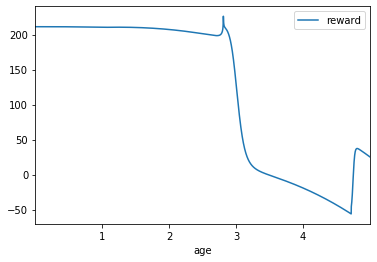

In [18]:
df.plot('age', 'reward')

In [ ]:
env.envs[0].action_space.high[2]